# Bitcoin Data Analysis
***
This analysis focuses on Bitcoin from April 9th, 2014 - December 30th, 2022. I will analyze various aspects of Bitcoin from this period, such as the price, number of transactions, traded Bitcoin, mining profitability, and more. The data was taken from [Bitcoin Data](https://bitinfocharts.com/). I've known about Bitcoin since 2015 but didn't know much about it. I remember when I built my first computer in the Summer of 2015, hearing about how people used graphics cards to mine Bitcoin, but that was it. So this analysis was interesting to look at, and I hope you enjoy looking through it!

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

I've imported Pandas, Seaborn, Matplotlib, and Numpy as these will be needed for the analysis.

In [2]:
df = pd.read_csv('BTC_Data_final.csv')

Below are the column names. Here we can get an idea of the various topics that can be analyzed as well as knowing the correct way of spelling each column during the analysis since it varies from dataset to dataset.

In [4]:
df.columns

Index(['Date', 'priceUSD', 'size', 'sentbyaddress', 'transactions',
       'mining_profitability', 'sentinusd', 'transactionfees',
       'median_transaction_fee', 'confirmationtime', 'marketcap',
       'transactionvalue', 'mediantransactionvalue', 'tweets', 'google_trends',
       'fee_to_reward', 'activeaddresses', 'top100cap'],
      dtype='object')

Below we can see the mean for the different columns such as the price in dollars for Bitcoin, which is **$12,211** throughout the eight and a half years. Mining profitability overall is relatively low. Bitcoin's lowest price during this time was **$197.60**, and its highest price was **$67,547**, which is quite a profit if you got in near the bottom during this time.

In [5]:
round(df.describe(), 1)

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
count,3180.0,3180.0,3180.0,3180.0,3180.0,3.180000e+03,3180.0,3180.0,3180.0,3.180000e+03,3180.0,3180.0,3180.0,3180.0,3180.0,3180.0,3180.0
mean,12210.7,702125.4,370935.1,236883.0,2.0,1.192082e+10,2.7,1.3,9.8,2.257468e+11,124672.5,406.7,52725.2,51.2,4.1,576954.5,17.2
std,16007.3,208326.5,132993.4,84283.7,5.0,2.244176e+10,5.9,3.1,1.2,3.026721e+11,237133.4,452.3,47209.4,57.6,5.4,240533.4,2.4
min,197.6,162260.0,70902.0,47579.0,0.1,9.471432e+07,0.0,0.0,0.0,2.655832e+09,1166.0,0.1,0.0,5.3,0.2,0.0,0.0
25%,604.0,583895.2,288086.8,192269.5,0.2,9.354786e+08,0.2,0.1,9.1,9.040045e+09,5850.5,129.2,21911.8,9.9,0.9,415207.0,15.2
50%,6571.5,740537.0,390244.5,252094.5,0.4,4.374385e+09,0.9,0.3,9.7,1.135541e+11,25602.0,305.5,30191.5,35.7,1.6,595685.5,17.2
75%,15238.5,879222.0,476081.2,296568.0,1.5,1.152109e+10,2.4,0.9,10.4,2.580889e+11,100043.5,542.4,75057.5,63.7,5.4,766242.5,19.2
max,67547.0,998092.0,730199.0,490459.0,40.7,3.833295e+11,62.8,34.1,24.8,1.274513e+12,2450460.0,5417.0,363566.0,616.9,43.6,1196069.0,21.8


As we can see below, there are no null values which is a good thing to see when analyzing data.

In [6]:
df.isnull().sum()

Date                      0
priceUSD                  0
size                      0
sentbyaddress             0
transactions              0
mining_profitability      0
sentinusd                 0
transactionfees           0
median_transaction_fee    0
confirmationtime          0
marketcap                 0
transactionvalue          0
mediantransactionvalue    0
tweets                    0
google_trends             0
fee_to_reward             0
activeaddresses           0
top100cap                 0
dtype: int64

I like to look at the top ten values in the data to get a good picture of what it looks like when put together with all the columns and rows.

In [7]:
df.head(10)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
0,2014/04/09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,5587996110,4115.0,100.420,8193,11.193,0.502,179274,19.211
1,2014/04/10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,5020359905,4876.0,120.946,15039,13.854,0.371,182996,19.166
2,2014/04/11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,5068919648,4819.0,108.481,14907,12.997,0.330,169622,19.141
3,2014/04/12,425.310,169964.0,87828,47579,34.498,157264741.0,0.0811,0.0425,8.944,5329088351,3574.0,84.408,7582,9.229,0.226,132283,19.145
4,2014/04/13,415.876,162260.0,94828,50981,34.141,154756367.0,0.0840,0.0416,7.701,5150414718,3332.0,69.681,10674,10.385,0.221,172708,19.131
5,2014/04/14,445.898,216048.0,127969,70026,37.973,253143718.0,0.0977,0.0446,7.461,5628122040,3990.0,115.249,13266,10.754,0.318,183291,19.146
6,2014/04/15,487.666,241539.0,123107,72627,38.650,293892234.0,0.1110,0.0488,7.912,6170470953,4479.0,123.089,14835,11.053,0.362,199054,19.124
7,2014/04/16,517.354,270984.0,114312,68435,40.201,389249585.0,0.1080,0.0517,9.057,6496569317,6046.0,129.799,15790,12.189,0.359,185075,19.146
8,2014/04/17,505.461,223631.0,102596,65021,40.706,385378002.0,0.1170,0.0505,8.521,6281237538,6384.0,102.416,15215,11.471,0.355,157751,19.092
9,2014/04/18,485.296,205478.0,100633,56836,35.818,360602878.0,0.1040,0.0485,9.000,5972292967,6461.0,107.713,14028,9.946,0.304,149452,19.054


Now we will start our analysis. I'm interested in the price change year to year, along with the percentage change. As we can see, the most significant percentage change was in 2017, when there was a 1,280.24% increase in Bitcoins price. 2017 was the year everything changed for Bitcoin because it started to become mainstream, and in the years below, as the price was creeping up, it was hard to deny that something could become of Bitcoin. The potential it had become too obvious when in 2017, it hit the mainstream and is where the average person had at least heard of Bitcoin. Obviously, other coins started to pop up because of Bitcoin's rise, along with new coins being made, but Bitcoin was and still is the leader of the Cryptocurrency world.

In [8]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')

for year, group in grouped_data:
  start_price = group['priceUSD'].iloc[0]
  end_price = group['priceUSD'].iloc[-1]
  
  change = end_price - start_price
  
  percentage_change = (change / start_price) * 100
  
  print(f'Year: {year}, Change: {change:.2f}, Percentage Change: {percentage_change:.2f}%')

Year: 2014, Change: -134.39, Percentage Change: -30.06%
Year: 2015, Change: 109.79, Percentage Change: 34.79%
Year: 2016, Change: 520.52, Percentage Change: 120.42%
Year: 2017, Change: 12431.01, Percentage Change: 1280.24%
Year: 2018, Change: -9719.00, Percentage Change: -71.87%
Year: 2019, Change: 3549.00, Percentage Change: 94.79%
Year: 2020, Change: 21638.00, Percentage Change: 298.95%
Year: 2021, Change: 18038.00, Percentage Change: 61.65%
Year: 2022, Change: -30324.00, Percentage Change: -64.38%


Below is the maximum price for each year which I thought would be interesting to look at. We can see in 2014, the maximum price was **$664.42**, and at the end of our data, in 2022, it hit **$47,546**. But that wasn't the year it hit its peak, as we can see. The highest was in 2021; as we mentioned earlier, it hit **$67,547**. The reason for this dropoff from 2021-2022 is the collapse of the stock market, which has made the crypto market follow suit. As of now, in early January of 2023, we already hit the textbook definition of a recession months ago, but many Americans, roughly 60%, are living paycheck to [paycheck](https://www.entrepreneur.com/business-news/60-of-americans-are-living-paycheck-to-paycheck-report/439518). So not only is it because of the collapse of the stock market and the crypto market following its trail, but the average American along with the average citizen in every Country in the world isn't able to fork over the money for Bitcoin or other coins for that matter at the current moment in time. The current price of Bitcoin right now is only **$16,937**, so the maximum price it hits in 2023 could only be in the **$30,000** range.

In [64]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
max_price_per_year = grouped_data['priceUSD'].max()

years = max_price_per_year.index

for year, max_price in zip(years, max_price_per_year):
  print(f"Year: {year}, Maximum Price: ${max_price:,.2f}")

Year: 2014, Maximum Price: $664.42
Year: 2015, Maximum Price: $462.59
Year: 2016, Maximum Price: $965.62
Year: 2017, Maximum Price: $19,401.00
Year: 2018, Maximum Price: $16,784.00
Year: 2019, Maximum Price: $12,668.00
Year: 2020, Maximum Price: $28,876.00
Year: 2021, Maximum Price: $67,547.00
Year: 2022, Maximum Price: $47,546.00


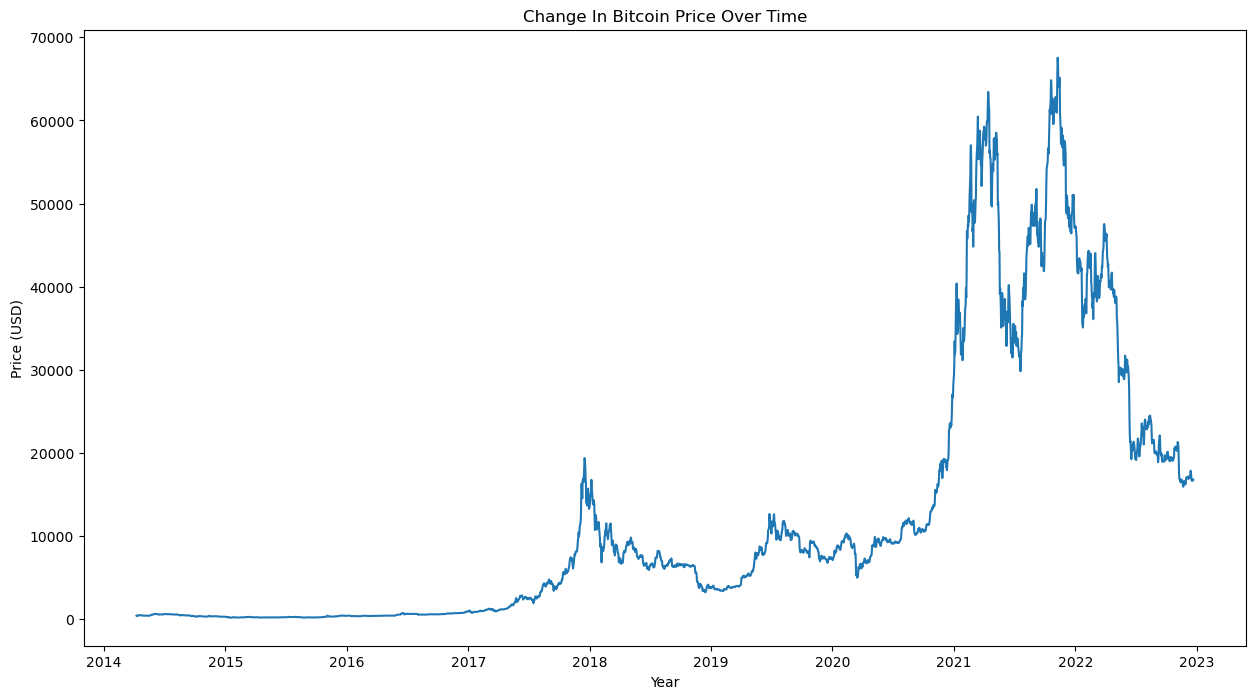

In [9]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15,8))

plt.plot(df['Date'], df['priceUSD'])

plt.title('Change In Bitcoin Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

plt.show()

Above, we can see just when Bitcoin started to gain traction. As mentioned above, in 2017, specifically towards the end of the year, Bitcoin skyrocketed, and all eyes were on the crypto world. It takes a dip the following year, but at the start of 2020, it skyrockets massively up into the $60,000 range. Anyone reading this knows the world shut down in March of 2020 because of COVID, so with stimulus money being forked out and there being little faith in the stock market since it crashed, my hunch is that people started taking their stimulus money along with a bit of whatever they had left over, and decided to invest in Cryptocurrency instead of the stock market. A big reason for choosing to invest in Cryptocurrency at the time was that it, along with other cryptocurrencies, was unregulated. Since then, there's been adding regulations to Cryptocurrency, but there's theory that this will only benefit Bitcoin primarily in the end. (https://bitcoinmagazine.com/legal/regulation-is-coming-bitcoin-will-benefit).

In [10]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')

results = []

for year, group in grouped_data:
  total_transactions = group['transactions'].sum()
  results.append((year, total_transactions))

for result in results:
  year, total_transactions = result
  print(f"Year: {year}, Total Transactions: {format(total_transactions, ',')}")

Year: 2014, Total Transactions: 18,951,966
Year: 2015, Total Transactions: 45,618,870
Year: 2016, Total Transactions: 82,571,772
Year: 2017, Total Transactions: 104,010,023
Year: 2018, Total Transactions: 81,340,729
Year: 2019, Total Transactions: 119,726,948
Year: 2020, Total Transactions: 112,497,226
Year: 2021, Total Transactions: 97,743,767
Year: 2022, Total Transactions: 90,826,733


Above is the total number of transactions for each year. The highest was in 2020 when the world closed down, and people lost faith in the stock market and went towards Cryptocurrency. Bitcoin was a focus of this surge in interest for crypto since it was the most popular coin, and because of this, people were confident that it had the most potential for a safer return. When adding up all nine years, there's been a total of roughly 753,288,034 transactions made.

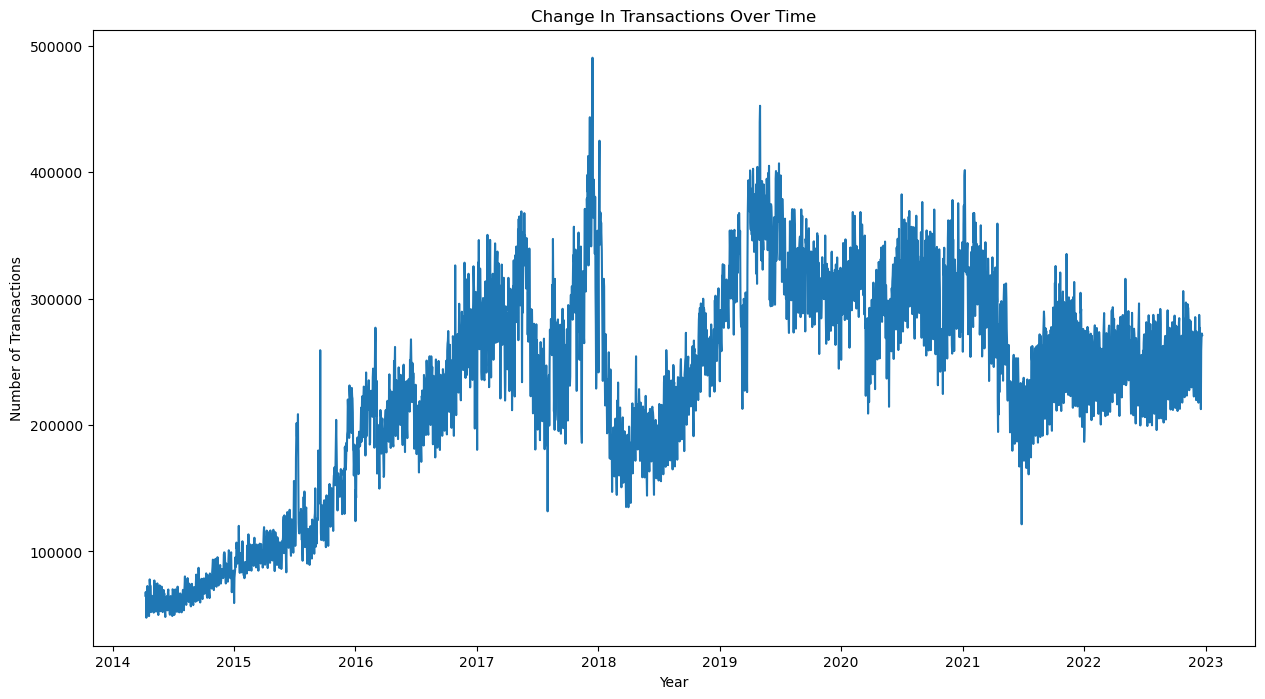

In [11]:
df = pd.read_csv('BTC_Data_final.csv')

grouped_data = df.groupby('Date')

transactions_per_year = grouped_data['transactions'].mean()

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15,8))

plt.plot(df['Date'], df['transactions'])

plt.title('Change In Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

plt.show()

The chart above has thick blue lines since it's the number of daily transactions, so it's charting a lot of data. That's why I decided to put the culmination of all transactions for each year so you can get a more accurate idea of the overall number of transactions each year.

In [12]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')

results = []

for year, group in grouped_data:
  total_size = group['size'].sum()
  results.append((year, total_size))

for result in results:
  year, total_size = result
  print(f"Year: {year}, Total Bitcoin Traded Per Year: {format(total_size, ',')}")

Year: 2014, Total Bitcoin Traded Per Year: 71,582,712.0
Year: 2015, Total Bitcoin Traded Per Year: 175,222,861.0
Year: 2016, Total Bitcoin Traded Per Year: 286,037,531.0
Year: 2017, Total Bitcoin Traded Per Year: 338,714,381.0
Year: 2018, Total Bitcoin Traded Per Year: 265,664,217.0
Year: 2019, Total Bitcoin Traded Per Year: 287,537,734.0
Year: 2020, Total Bitcoin Traded Per Year: 299,181,950.0
Year: 2021, Total Bitcoin Traded Per Year: 276,666,353.0
Year: 2022, Total Bitcoin Traded Per Year: 232,151,057.0


Above, we have the total number of Bitcoin traded each year. The highest, surprisingly, wasn't in 2020, although it was somewhat close, but in 2017 when Bitcoin had its most considerable percentage gain value-wise out of any year since 2014. There was a whopping 338,714,381 Bitcoin traded. A reason for this could be that, yes, there was less Bitcoin available at the time in circulation. Still, the price was considerably lower, especially in the earlier parts of 2017, compared to the price in 2020 and even the years following.

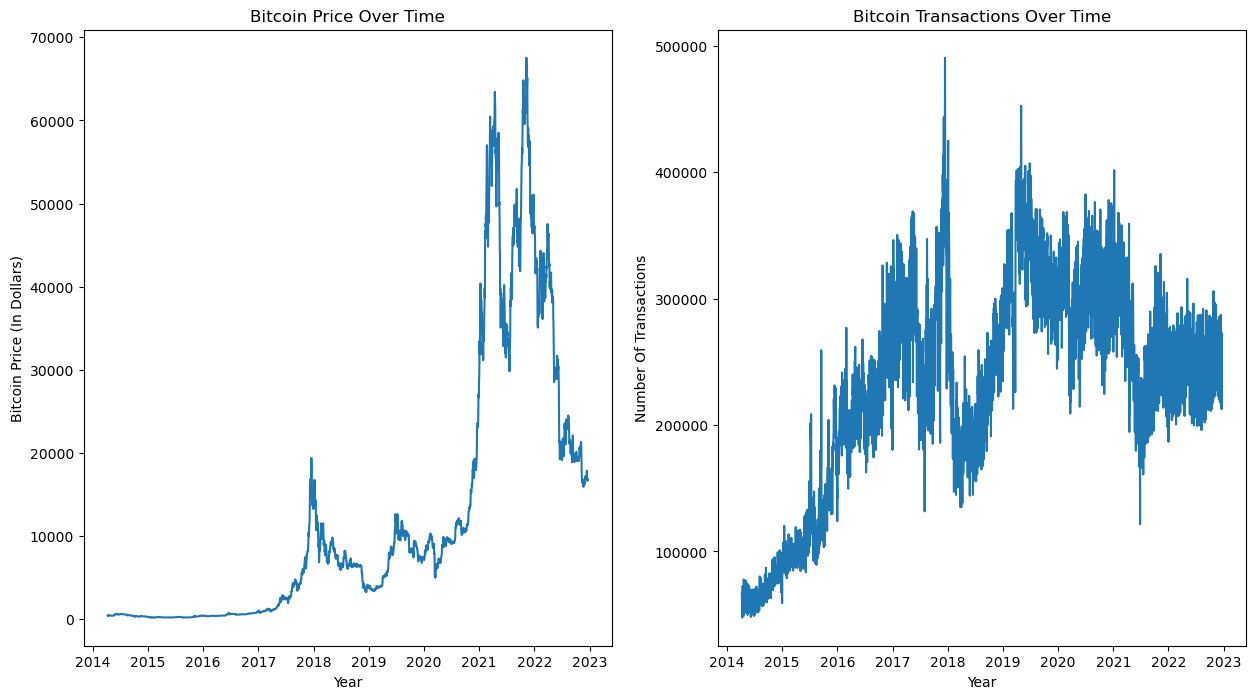

In [178]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)

plt.plot(df['Date'], df['priceUSD'])

plt.xlabel('Year')

plt.ylabel('Bitcoin Price (In Dollars)')

plt.title('Bitcoin Price Over Time')

plt.subplot(1, 2, 2)

plt.plot(df['Date'], df['transactions'])

plt.xlabel('Year')

plt.ylabel('Number Of Transactions')

plt.title('Bitcoin Transactions Over Time')

plt.show()

Above is a comparison I thought would be interesting to do, which is looking at the chart for the price of Bitcoin and the number of transactions to see how closely these two graphs are. There's quite a correlation for the most part, except for the last couple of years in the data from 2021-2022. The highest number of transactions in a day was set in 2017 when there was that massive spike in price for Bitcoin, but the cost of Bitcoin since roughly the middle of 2021 has been plummeting along with the stock market since they follow each other pretty closely. Interestingly, the number of transactions dipped in the middle of 2021 but then rose and hasn't continuously fallen, unlike the price of Bitcoin. What this means is people think that the bottom is near and are trying to buy Bitcoin even though the price has constantly been falling, especially in 2022. It's the idea of catching a falling knife and always thinking the bottom is near or we're at the bottom of the market, and then it continues to keep going down, which has been the case for both the stock market and Bitcoin and Cryptocurrency as well.

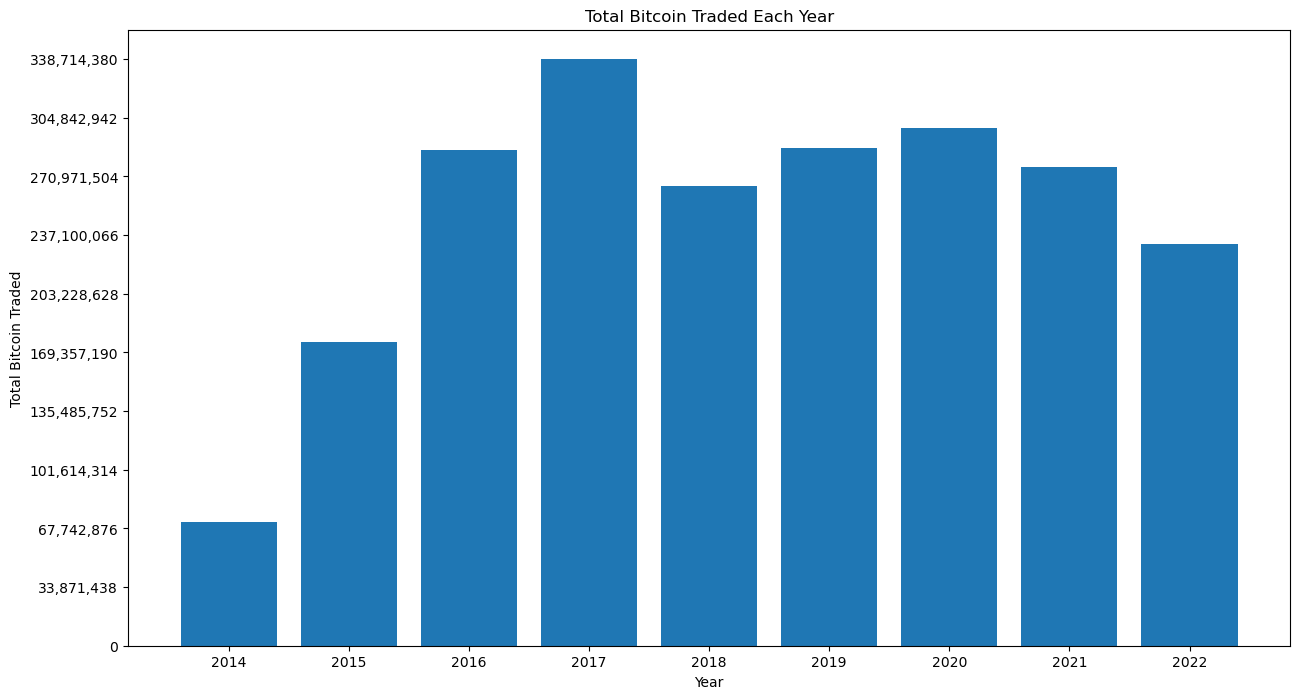

In [11]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
size_per_year = grouped_data['size'].sum()

years = size_per_year.index
size_per_year = size_per_year.astype(int)

plt.figure(figsize=(15,8))

plt.bar(years, size_per_year)

plt.yticks(range(0, max(size_per_year)+1, int(max(size_per_year)/10)), [f'{x:,}' for x in range(0, max(size_per_year)+1, int(max(size_per_year)/10))])

plt.xticks(np.arange(min(years), max(years)+1, 1.0))

plt.xlabel('Year')

plt.ylabel('Total Bitcoin Traded')

plt.title('Total Bitcoin Traded Each Year')

plt.show()

I added a graph of the total Bitcoin traded yearly for those looking to have a clearer idea instead of reading numbers.

In [72]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')

results = []

for year, group in grouped_data:
  total_market_cap = group['marketcap'].max()
  results.append((year, total_market_cap))

for result in results:
  year, total_market_cap = result
  print(f"Year: {year}, Max Market Cap: ${format(total_market_cap, ',')}")


Year: 2014, Max Market Cap: $8,358,852,783
Year: 2015, Max Market Cap: $6,922,542,459
Year: 2016, Max Market Cap: $15,504,767,388
Year: 2017, Max Market Cap: $324,637,578,489
Year: 2018, Max Market Cap: $281,493,165,811
Year: 2019, Max Market Cap: $225,273,419,335
Year: 2020, Max Market Cap: $536,723,362,544
Year: 2021, Max Market Cap: $1,274,512,840,508
Year: 2022, Max Market Cap: $903,241,368,632


Here we have the highest Bitcoin's market cap reached each year, with 2021 being the highest at almost 1.3 trillion dollars. Since then, it's dropped to where it is today, on January 6th, 2023, at $326,506,700,930. Bitcoin's market cap has almost dropped one trillion dollars since 2021, which is wild. Still, when you also consider how much everything else has dropped, even top stocks like Amazon, which has lost almost 50% of its value in the past year, it's been one of the worst market conditions of all time, and Cryptocurrency is no different.

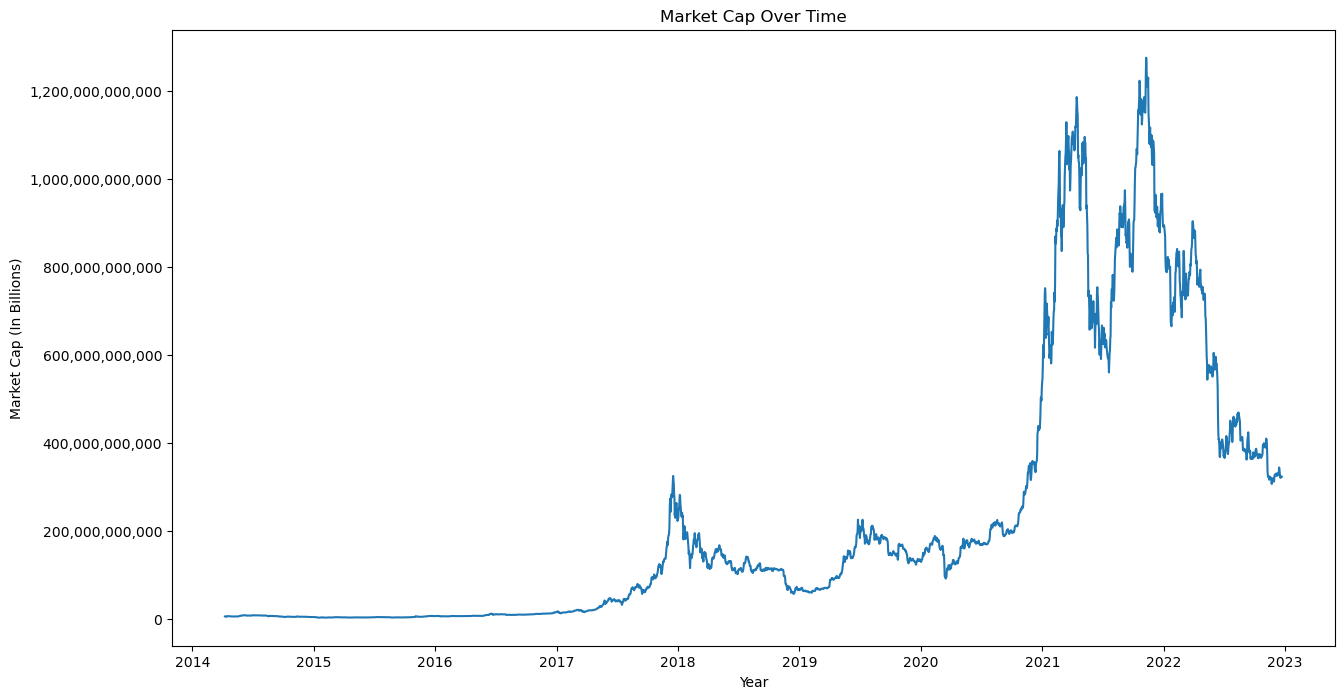

In [71]:
grouped_data = df.groupby('Date')

years = []
market_caps = []

for year, group in grouped_data:
  total_market_cap = group['marketcap'].max()
  years.append(year)
  market_caps.append(total_market_cap)

plt.figure(figsize=(15,8))
plt.plot(years, market_caps)

plt.xlabel('Year')

plt.ylabel('Market Cap (In Billions)')

plt.title('Market Cap Over Time')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


In [46]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
fees_per_year = grouped_data['transactionfees'].mean().apply(round)

for year, fees in fees_per_year.items():
  print(f"Year: {year}, Total Transaction Fees: ${format(fees, ',')}")

Year: 2014, Total Transaction Fees: $0
Year: 2015, Total Transaction Fees: $0
Year: 2016, Total Transaction Fees: $0
Year: 2017, Total Transaction Fees: $5
Year: 2018, Total Transaction Fees: $3
Year: 2019, Total Transaction Fees: $1
Year: 2020, Total Transaction Fees: $3
Year: 2021, Total Transaction Fees: $10
Year: 2022, Total Transaction Fees: $2


Transaction fees are something I wasn't aware of with Cryptocurrency since I've never used it or looked into it much, but here we can see how little the transaction fees were back in 2014-2015. They hit their highest in 2021 at almost $10, which makes sense because the transaction fee follows the price of Bitcoin for the most part. It dropped the following year in 2022 to just over a dollar and a half.

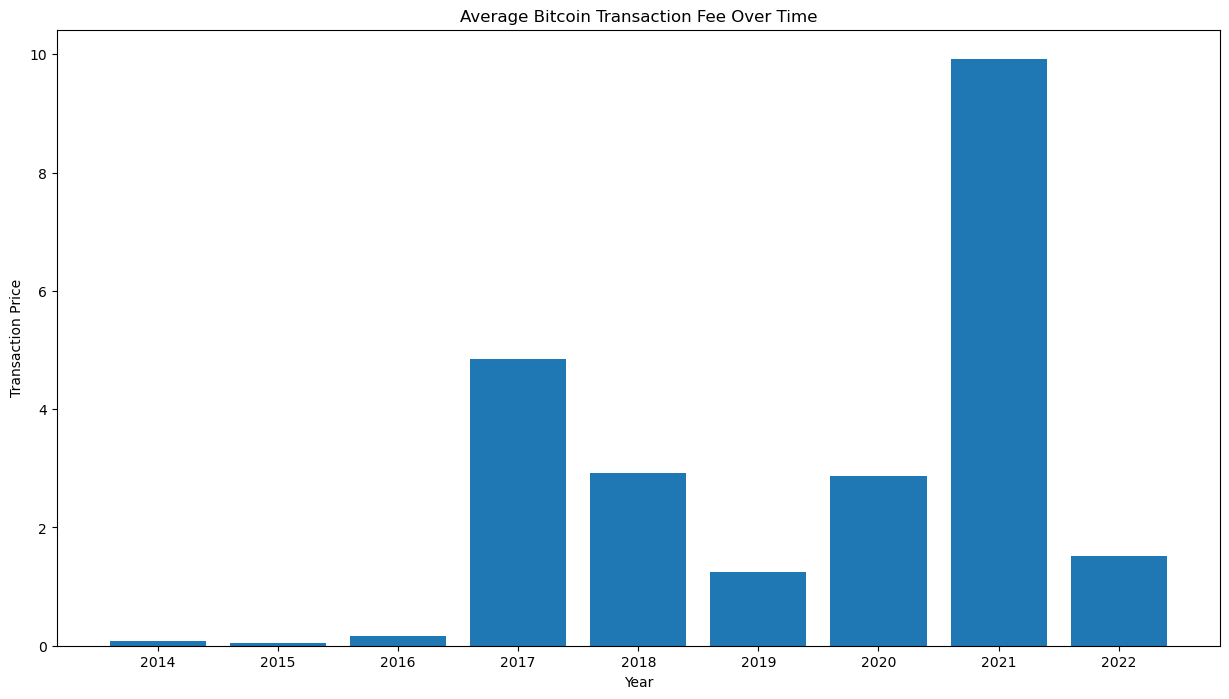

In [139]:
import numpy as np

df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
fees_per_year = grouped_data['transactionfees'].mean()

years = fees_per_year.index

plt.figure(figsize=(15,8))

plt.bar(years, fees_per_year)

plt.xlabel('Year')

plt.xticks(np.arange(min(years), max(years)+1, 1.0))

plt.ylabel('Transaction Price')

plt.title('Average Bitcoin Transaction Fee Over Time')

plt.show()


In [45]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
fees_per_year = grouped_data['transactionfees'].max().apply(round)

for year, fees in fees_per_year.items():
  print(f"Year: {year}, Maximum Transaction Fee: ${format(fees, ',')}")

Year: 2014, Maximum Transaction Fee: $0
Year: 2015, Maximum Transaction Fee: $0
Year: 2016, Maximum Transaction Fee: $1
Year: 2017, Maximum Transaction Fee: $55
Year: 2018, Maximum Transaction Fee: $33
Year: 2019, Maximum Transaction Fee: $7
Year: 2020, Maximum Transaction Fee: $13
Year: 2021, Maximum Transaction Fee: $63
Year: 2022, Maximum Transaction Fee: $4


Here we have the highest transaction fee number for each year, and what shocked me was that overall, as we saw, 2021 had the highest average transaction fees out of any year, but at one point, they hit almost a staggering $63.

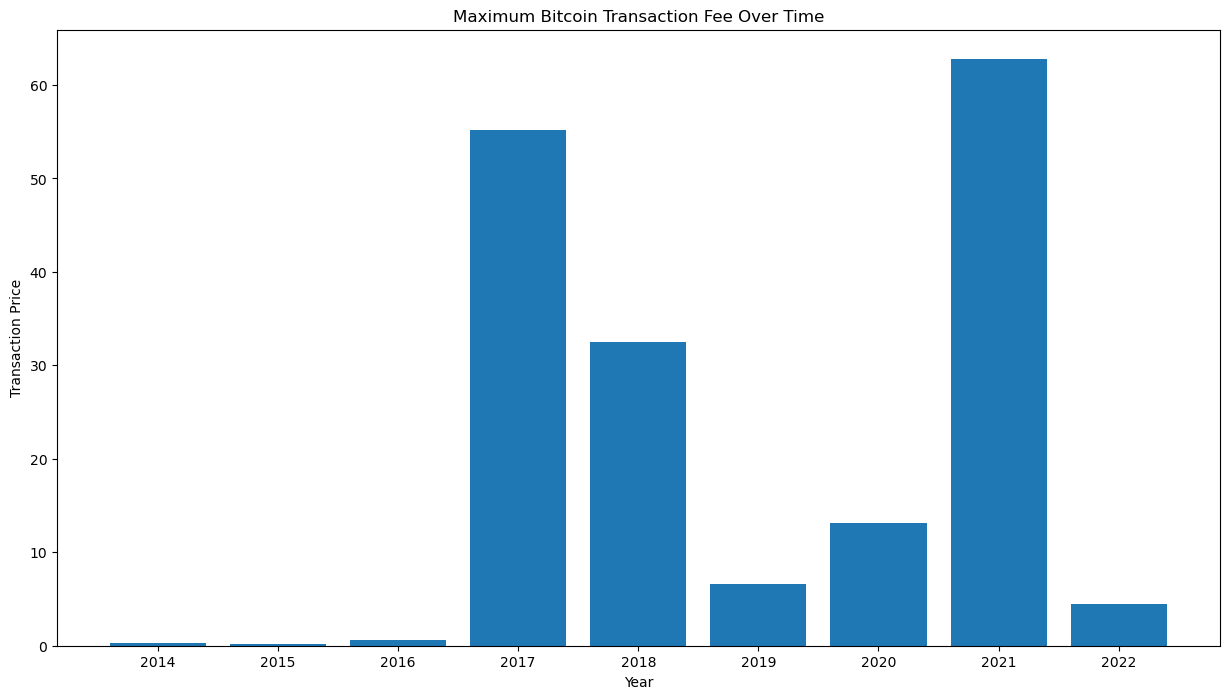

In [140]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
fees_per_year = grouped_data['transactionfees'].max()

years = fees_per_year.index

plt.figure(figsize=(15,8))

plt.bar(years, fees_per_year)

plt.xlabel('Year')

plt.xticks(np.arange(min(years), max(years)+1, 1.0))

plt.ylabel('Transaction Price')

plt.title('Maximum Bitcoin Transaction Fee Over Time')

plt.show()

In [175]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
google_trends_per_year = grouped_data['google_trends'].sum()

google_trends_per_year = google_trends_per_year.apply(round)

for year, total_trends in google_trends_per_year.items():
 print(f"Year: {year}, Total Google Trends: {format(total_trends, ',')}")

Year: 2014, Total Google Trends: 2,201
Year: 2015, Total Google Trends: 2,817
Year: 2016, Total Google Trends: 3,731
Year: 2017, Total Google Trends: 25,347
Year: 2018, Total Google Trends: 21,747
Year: 2019, Total Google Trends: 14,795
Year: 2020, Total Google Trends: 19,606
Year: 2021, Total Google Trends: 51,925
Year: 2022, Total Google Trends: 20,636


Google trends, to me, when looking at this dataset, didn't stand out as something that would mean much when it comes to the correlation it has to Bitcoin's price, but I thought it would be nice to at least show the total number of Google trends each year with Bitcoin. It reached its highest level of trends in 2021, with 51,925. Typically, Google trends would follow suit with how popular Bitcoin is since if Bitcoin is constantly going up and reaching new highs, then the amount of Google searches and thus trends rise. There's a scientific paper on whether there's a correlation between the price of Bitcoin and Google trends and whether or not one affects the other. The result was what I hypothesized in that there's no real correlation in terms of Google trends being an indicator of when to buy Bitcoin, but it talks more about how big investment banks such as Goldman Sachs and Morgan Stanley have been eyeing Cryptocurrency, which could lead to higher highs in the future once the recession has been over for a while.
(https://www.sciencedirect.com/science/article/pii/S1544612321005833)

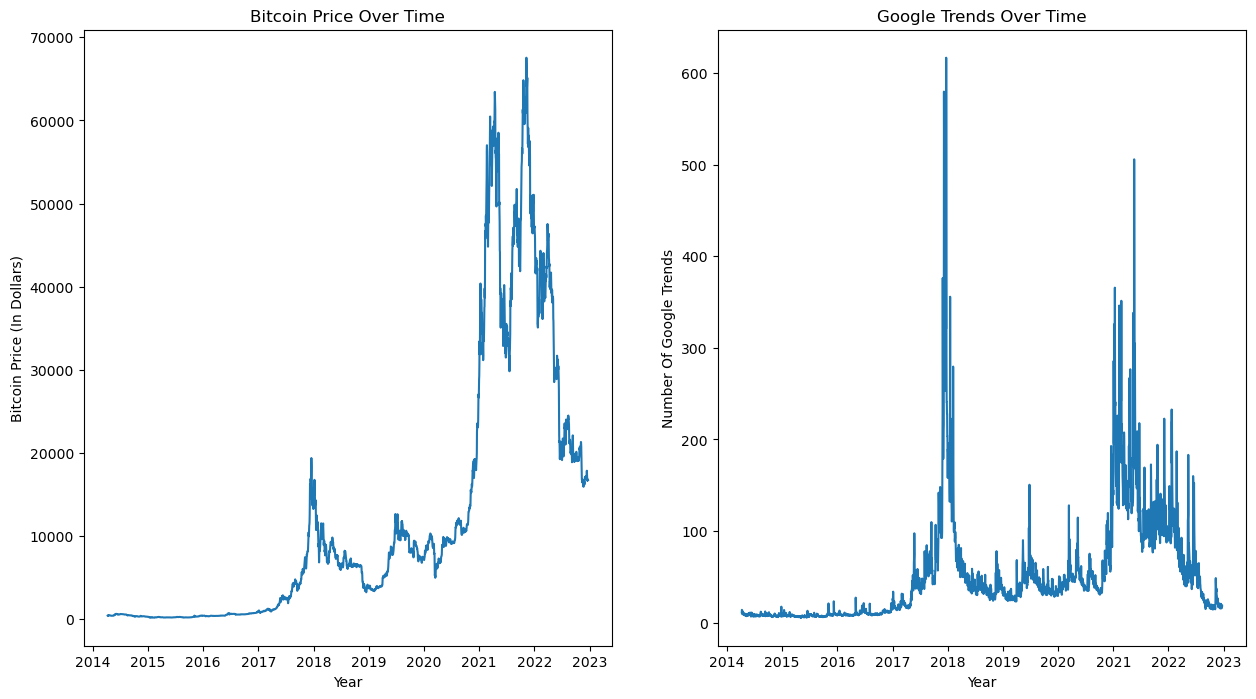

In [162]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)

plt.plot(df['Date'], df['priceUSD'])

plt.xlabel('Year')

plt.ylabel('Bitcoin Price (In Dollars)')

plt.title('Bitcoin Price Over Time')

plt.subplot(1, 2, 2)

plt.plot(df['Date'], df['google_trends'])

plt.xlabel('Year')

plt.ylabel('Number Of Google Trends')

plt.title('Google Trends Over Time')

plt.show()


Earlier in the analysis, I compared the price of Bitcoin to transactions, and they didn't follow a similar trend for the most part beyond 2017. Here though, we can see Google trends has more of a correlation which can be seen in the graph with Bitcoin over time. As the price of Bitcoin increases, so do the Google trends for it as a topic, with 2017 having the highest spike in Google trends. We see more of a correlation between Google trends vs. the number of transactions in the last couple of years, where when the price of Bitcoin drops, so does the number of Google trends. This makes sense as the hype is dead with how much the price of Bitcoin has fallen and the general public not caring to talk about it anymore.

In [173]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

grouped_data = df.groupby('Year')
google_trends_per_year = grouped_data['tweets'].sum()

google_trends_per_year = google_trends_per_year.apply(round)

for year, total_trends in google_trends_per_year.items():
  print(f"Year: {year}, Total Tweets: {format(total_trends, ',')}")

Year: 2014, Total Tweets: 5,386,955
Year: 2015, Total Tweets: 11,230,758
Year: 2016, Total Tweets: 8,383,482
Year: 2017, Total Tweets: 17,468,326
Year: 2018, Total Tweets: 14,348,777
Year: 2019, Total Tweets: 6,924,992
Year: 2020, Total Tweets: 12,615,272
Year: 2021, Total Tweets: 41,767,844
Year: 2022, Total Tweets: 49,539,662


Tweets were a column in the data that is more similar to Google trends. The more Bitcoin rises, there's going to be more hype around it which leads to the public talking about it more. The same happens with Twitter and tweets since it's a social media platform. Interestingly, the highest number of tweets was in 2022, when the price had already fallen drastically. Usually, with everything we've looked at so far, the highest of things, whether it's the price of Bitcoin, the number of transactions, or Google trends, is always either in 2017 or 2021, when Bitcoin was at its peak in popularity, but here we don't see that. This means the general public, at least on Twitter if that means anything, still is showing more interest than ever in Bitcoin even though the price is still meager from its 2021 prices.

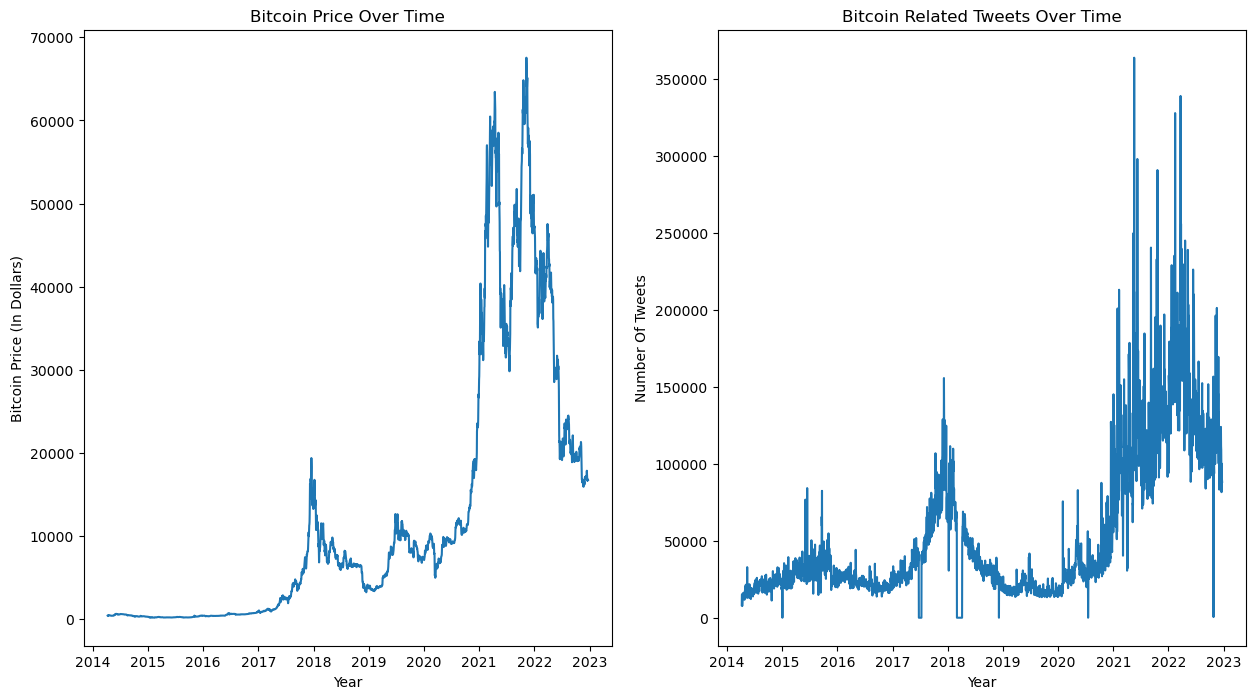

In [172]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)

plt.plot(df['Date'], df['priceUSD'])

plt.xlabel('Year')

plt.ylabel('Bitcoin Price (In Dollars)')

plt.title('Bitcoin Price Over Time')

plt.subplot(1, 2, 2)

plt.plot(df['Date'], df['tweets'])

plt.xlabel('Year')

plt.ylabel('Number Of Tweets')

plt.title('Bitcoin Related Tweets Over Time')

plt.show()

In [13]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year


grouped_data = df.groupby('Year')

results = []

for date, group in grouped_data:
  mining_profit = group['mining_profitability'].mean()
  results.append((date, mining_profit))

for result in results:
  date, mining_profit = result
  print(f"Date: {date}, Mining Profit: {mining_profit:.2f}")

Date: 2014, Mining Profit: 14.94
Date: 2015, Mining Profit: 2.55
Date: 2016, Mining Profit: 1.10
Date: 2017, Mining Profit: 1.17
Date: 2018, Mining Profit: 0.53
Date: 2019, Mining Profit: 0.22
Date: 2020, Mining Profit: 0.11
Date: 2021, Mining Profit: 0.31
Date: 2022, Mining Profit: 0.12


Above is the average mining profitability of Bitcoin over time. The interesting thing about mining bitcoin is that it started increasing graphics card prices since graphics cards are used to mine Bitcoin. It became an issue to the point where Nvidia, which makes graphics cards, began restricting the use of its graphics cards for mining Bitcoin since there starting to become a shortage of graphics cards for the gaming community. This news came out in 2021 when the new GeForce RTX series graphics cards were said to have reduced cryptocurrency mining capabilities. Things have even gotten to the point where at the end of 2022, New York became the first state to ban certain types of crypto mining. The reduction of available graphics cards, along with reduced crypto mining capabilities, is what, over time, caused the profitability of Bitcoin to fall.

In [15]:
df = pd.read_csv('BTC_Data_final.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year


grouped_data = df.groupby('Year')

results = []

for date, group in grouped_data:
  mining_profit = group['mining_profitability'].max()
  results.append((date, mining_profit))

for result in results:
  date, mining_profit = result
  print(f"Date: {date}, Mining Profit: {mining_profit:.2f}")

Date: 2014, Mining Profit: 40.71
Date: 2015, Mining Profit: 4.05
Date: 2016, Mining Profit: 2.33
Date: 2017, Mining Profit: 3.84
Date: 2018, Mining Profit: 3.14
Date: 2019, Mining Profit: 0.50
Date: 2020, Mining Profit: 0.22
Date: 2021, Mining Profit: 0.46
Date: 2022, Mining Profit: 0.25


We can see the all-time high in a day for crypto mining with Bitcoin was **$40.71**. The issue with the data I'm analyzing is that there needs to be more information on some of the columns. Many columns are straightforward in what they're about, but some aren't, especially with specifics. So I'm not sure if the **$40.71** in a day is from one graphics card, three, etc. This also goes for every other day since there's nothing on how this measurement was done.

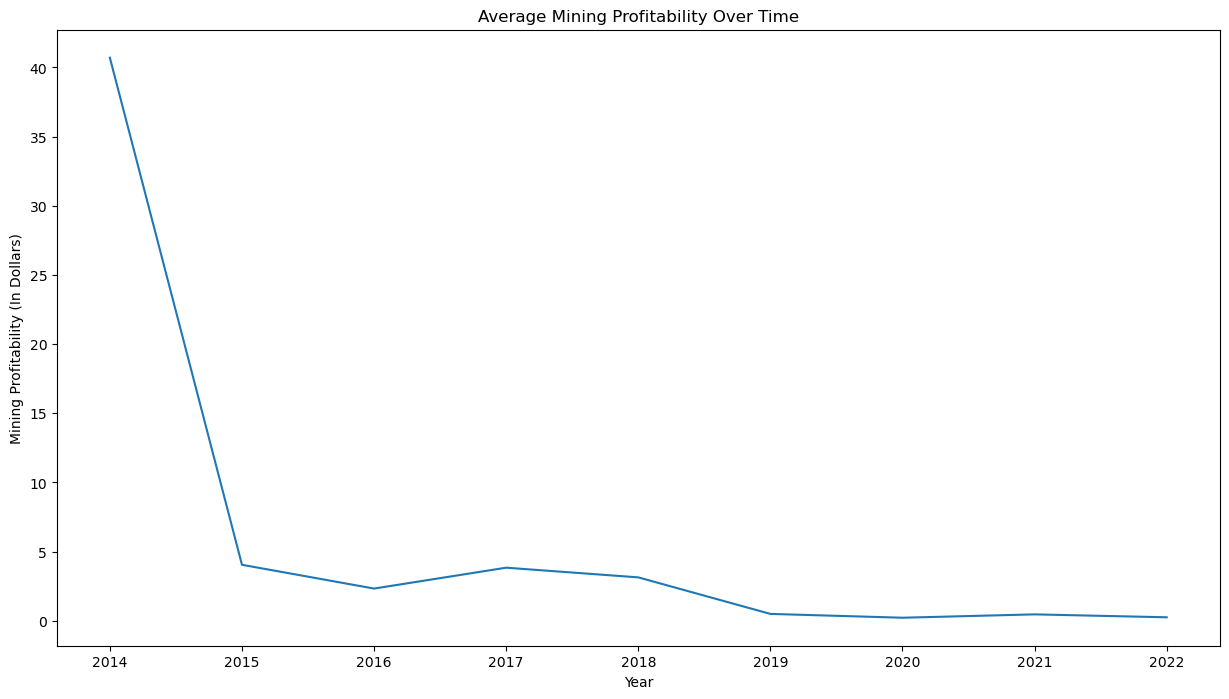

In [44]:
df = pd.read_csv('BTC_Data_final.csv')

years, mining_profits = zip(*results)

plt.figure(figsize=(15,8))

plt.plot(years, mining_profits)

plt.title('Average Mining Profitability Over Time')
plt.xlabel('Year')
plt.ylabel('Mining Profitability (In Dollars)')

plt.show()

In conclusion, this was a fun analysis for me, and I hope you enjoyed learning more about Bitcoin regarding statistics and the correlation between certain factors such as Google trends, tweets, mining profitability, and so on! I'm shocked that the profit for mining Bitcoin has gone down so much, but it makes sense, all things considered. The biggest thing as we advance is whether Bitcoin and other coins will recover to their peak 2021 prices. The recession we're in has been rough for everyone, no matter what country you live in, and with Cryptocurrency still needing to prove itself since it's only been in the mainstream for about seven years or so, that's not a lot of time. There's a lot of fear in the crypto market that has had people selling off their coins. On the flip side, the stock market is also down, but the stock market has many institutions invested, has a very long track record, and has bounced back every time from a recession. This is truly a matter of only time will tell, but I'm optimistic that it will bounce back.